In [1]:
# importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

/Users/hosiajosindra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# importing the datasets
nsfg = pd.read_hdf('nsfg.hdf5')

## NSFG 
<b> National Survey of Family Growth. </b> <br>
Data from the National Center for Health Statistics Information

In [3]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [4]:
print('nfsg (row, column) = {}'.format(nsfg.shape))

nfsg (row, column) = (9358, 10)


In [5]:
print('nfsg columns = \n{}'.format(nsfg.columns))

nfsg columns = 
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')


## Clean and Validate

### selecting columns

In [6]:
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

In [7]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

### describe

In [8]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

### replace

In [9]:
pounds = pounds.replace([98, 99], np.nan)
pounds.mean()
ounces.replace([98, 99], np.nan, inplace=True)

### arithmetic with series

In [10]:
birth_weight = pounds + ounces / 16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [11]:
# the value 2575 means that the respondent's age was 25.75, so
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

### histogram

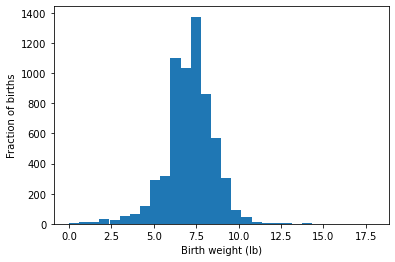

In [12]:
plt.hist(birth_weight.dropna(), bins=30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

### boleean series

In [13]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

### filtering

In [14]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [15]:
# logical notation ~ means negations
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

#### Notes !
* birth_weight[A & B]    # both true
* birth_weight[A | B]    # either or both true

## GSS
<b> General Social Survey. </b>
* Annual sample of U.S. population.
* Asks about demographics, social and political beliefs.
* Widely used by policy makers and researchers.

In [16]:
# importing the datasets
gss = pd.read_hdf('gss.hdf5') 

In [17]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [18]:
# importing the packages
from empiricaldist import Pmf, Cdf

### From PMF to CDF 
If you draw a random element from a distribution: <br>
* PMF (Probability Mass Function) is the probability that you get exactly x
* CDF (Cumulative Distribution Function) is the probability that you get a value <= x <br> 
for a given value of x.

## PMF

In [19]:
# use .from_seq()
pmf_educ = Pmf.from_seq(gss['educ'], normalize=False)
pmf_educ.head()

,probs
0.0,144
1.0,38
2.0,151


In [20]:
# evaluating the PMF
pmf_educ[12]

19145

In [21]:
# normalization
pmf_educ = Pmf.from_seq(gss['educ'], normalize=True)
pmf_educ.head()

,probs
0.0,0.002311
1.0,0.000610
2.0,0.002424


In [22]:
# evaluating the PMF
pmf_educ[12]

0.3072836414997432

### bar plot

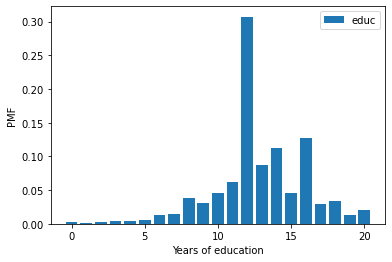

In [23]:
pmf_educ.bar(label='educ')
plt.xlabel('Years of education')
plt.ylabel('PMF')
plt.legend()
plt.show()

## CDF

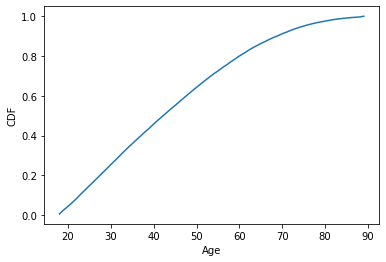

In [24]:
# use .from_seq()
cdf_age = Cdf.from_seq(gss['age'])

# plot
cdf_age.plot(label = 'Age')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.show()

In [25]:
# evaluating the CDF
qs = 51
ps = cdf_age(qs)
print(ps)

0.6602013455146835


In [26]:
# evaluating the inverse CDF
ps = 0.25
qs = cdf_age.inverse(ps)
print(qs)

30.0


### example

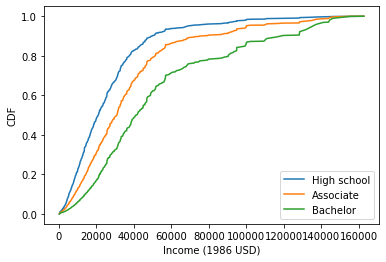

In [27]:
# income
income = gss['realinc']
cdf_income = Cdf.from_seq(income) 

# educ
educ = gss['educ']
high = (educ <= 12) # high school
assc = ((educ >= 14) & (educ < 16)) # associate
bach = (educ >= 16) # bachelor

inc_high = Cdf.from_seq(income[high])
inc_assc = Cdf.from_seq(income[assc])
inc_bach = Cdf.from_seq(income[bach])

# plot 
inc_high.plot(label='High school')
inc_assc.plot(label='Associate')
inc_bach.plot(label='Bachelor')

plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [28]:
# using inverse to evaluate iqr for outliers interval
percentile_75th = cdf_income.inverse(0.75)
percentile_25th = cdf_income.inverse(0.25)
iqr = percentile_75th - percentile_25th
print(iqr)

29676.0


### the normal distribution

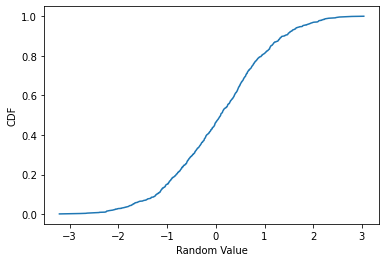

In [29]:
sample = np.random.normal(size=1000)
cdf_normal = Cdf.from_seq(sample)
cdf_normal.plot()

plt.xlabel('Random Value')
plt.ylabel('CDF')
plt.show()

In [30]:
# improrting the package
from scipy.stats import norm

### the normal CDF

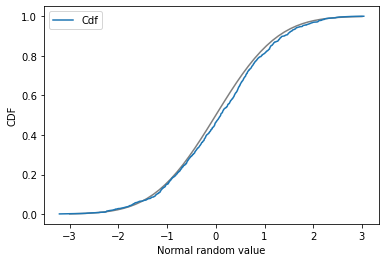

In [31]:
xs = np.linspace(-3, 3)
ys = norm(0,1).cdf(xs)

plt.plot(xs, ys, color='gray')
cdf_norm = Cdf.from_seq(sample)
cdf_norm.plot(label='Cdf')

plt.xlabel('Normal random value')
plt.ylabel('CDF')
plt.legend()
plt.show()

### the bell curve

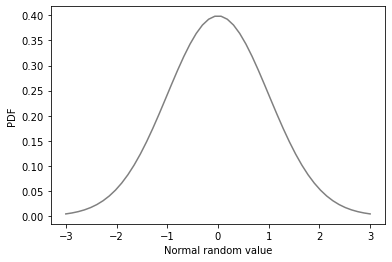

In [32]:
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)

plt.plot(xs, ys, color='gray')
plt.xlabel('Normal random value')
plt.ylabel('PDF')
plt.show()

### KDE

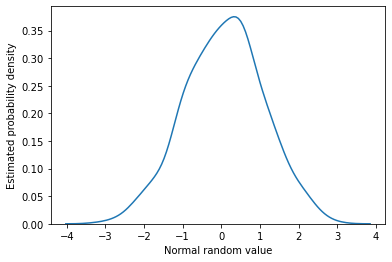

In [33]:
sns.kdeplot(sample)

plt.xlabel('Normal random value')
plt.ylabel('Estimated probability density')
plt.show()

### KDE and PDF

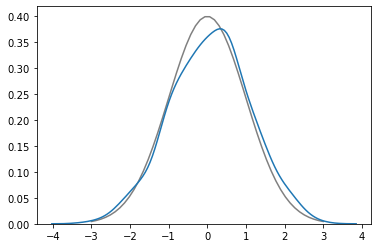

In [34]:
xs = np.linspace(-3, 3)
ys = norm.pdf(xs)
plt.plot(xs, ys, color='gray')

sns.kdeplot(sample)
plt.show()

### normal (dist vs log)

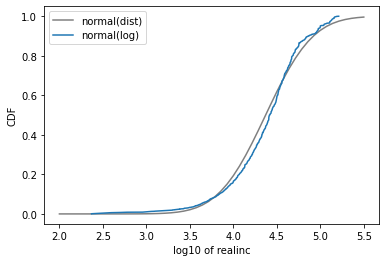

In [35]:
# the normal CDF model using log
income = gss['realinc']
log_income = np.log10(gss['realinc'])

# mean and standard deviation
mean = log_income.mean()
std = log_income.std()

# make a norm object
dist = norm(mean, std)

# the normal CDF model using dist (with range ((min)log_income, (max)log_income)
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# plot
plt.clf()
plt.plot(xs, ys, color='gray', label='normal(dist)')

# CDF and plot of log_income
cdf_log_income = Cdf.from_seq(log_income)
cdf_log_income.plot(label='normal(log)')

plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.legend()
plt.show()

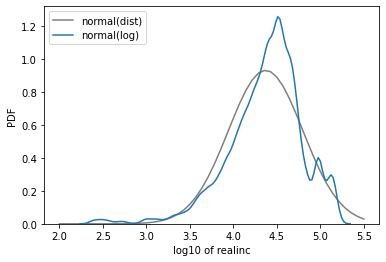

In [36]:
# the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray', label='normal(dist)')

# plot the data KDE
sns.kdeplot(log_income, label='normal(log)')

plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

## BRFSS
<b> Behavioral Risk Factor Surveillance System. </b>

In [37]:
# importing the dataset
brfss = pd.read_hdf('brfss.hdf5')

In [38]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


## scatterplot

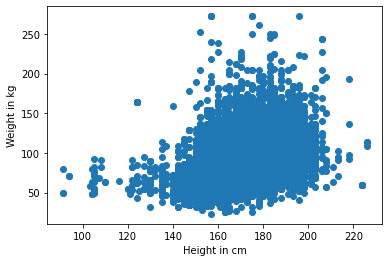

In [39]:
# height vs weight
height = brfss['HTM4']
weight = brfss['WTKG3']

plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### transparency

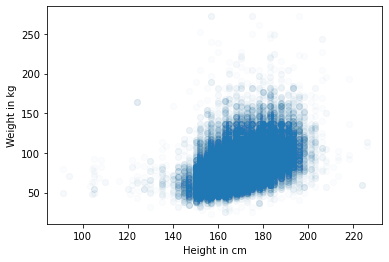

In [40]:
plt.plot(height, weight, 'o', alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### markersize

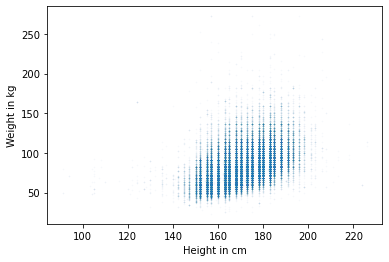

In [41]:
plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### jittering

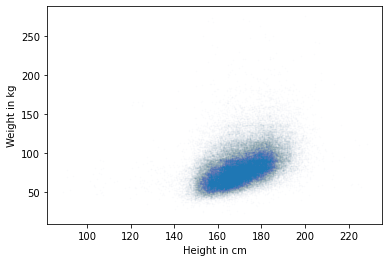

In [42]:
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### zoom

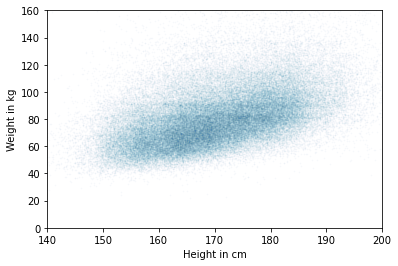

In [43]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### example 2

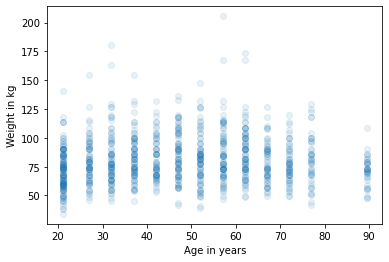

In [44]:
brfss1000 = brfss[:1000]

age = brfss1000['AGE']
weight = brfss1000['WTKG3']

# plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

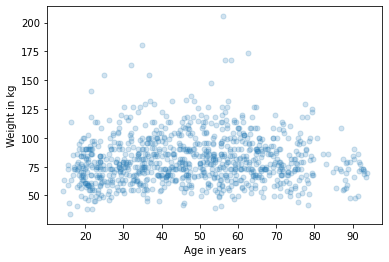

In [45]:
# jittering age
age = brfss1000['AGE'] + np.random.normal(0, 2.5, size=len(brfss1000))

# plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

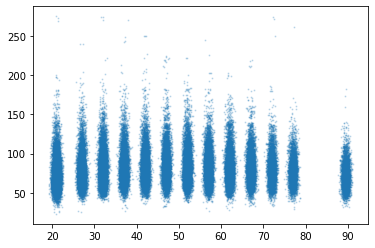

In [46]:
# more data
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.show()

## violin plot

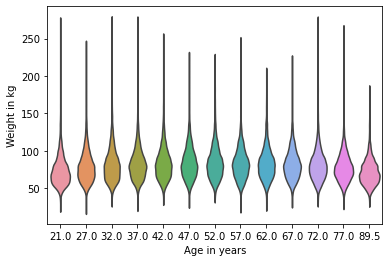

In [47]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

## box plot

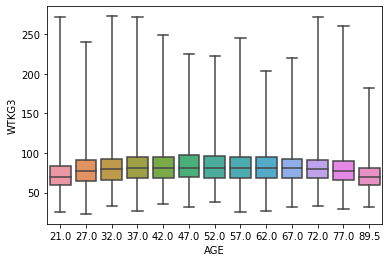

In [48]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

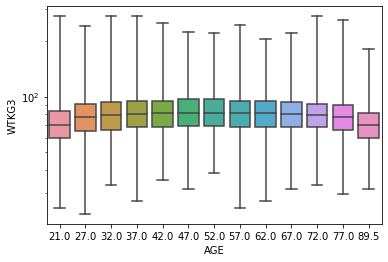

In [49]:
# log scale
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

### example 3

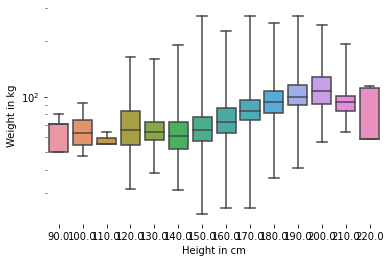

In [50]:
# drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# box plot
sns.boxplot(x = '_HTMG10', y = 'WTKG3', data = data, whis =10)

# plot on a log scale
plt.yscale('log')

# remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

### example 4

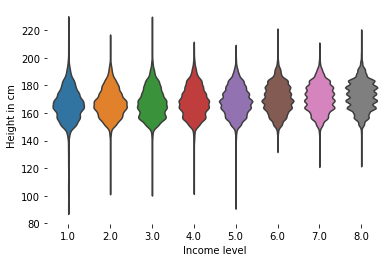

In [51]:
# drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# violin plot
sns.violinplot(x = 'INCOME2', y = 'HTM4', data=data, inner=None)

# remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## correlation and simple regression
are only for linear relationship.

In [52]:
# importing the package
from scipy.stats import linregress

In [53]:
# correlation coefficient
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


### example 4

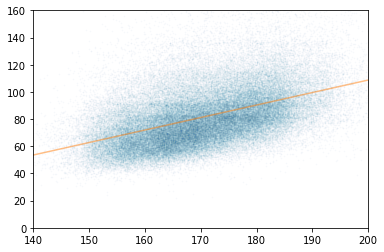

In [54]:
# have plotted before
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])

# regression line
subset = brfss.dropna(subset = ['WTKG3', 'HTM4'])

xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

# plot
plt.plot(fx, fy, '-', alpha = 0.5)
plt.show()

### example 5

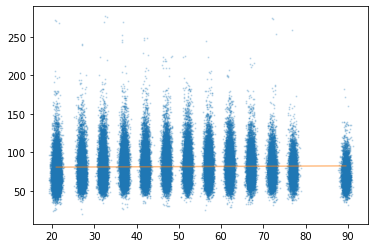

In [55]:
# more data
subset = brfss.dropna(subset = ['AGE', 'WTKG3'])
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(age, weight, 'o', markersize=1, alpha=0.2)
plt.plot(fx, fy, '-', alpha = 0.5)

plt.show()

### example 6
with concolusion: we have to use non linear regression (multiple regression).

In [56]:
# income vs vegetable
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# linear regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)


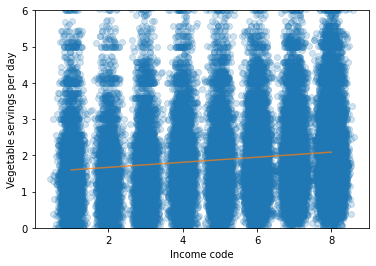

In [57]:
# plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx

plt.plot(fx, fy, '-', alpha=0.7)
plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

## multiple regression
notes : regression is not symmetric.


In [58]:
# importing the package
import statsmodels.formula.api as smf

### linregress vs statsmodels

In [59]:
# run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print("\n linregress's results: {}".format(res))

# run regression with statsmodels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print("\n statsmodels's results: {}".format(results.params))


 linregress's results: LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)

 statsmodels's results: Intercept    1.528779
INCOME2      0.069880
dtype: float64


### example 7

In [60]:
# make age and educ non linear
gss['age2'] = gss['age']**2
gss['educ2'] = gss['educ']**2

# regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data = gss).fit()

# print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


### example 8

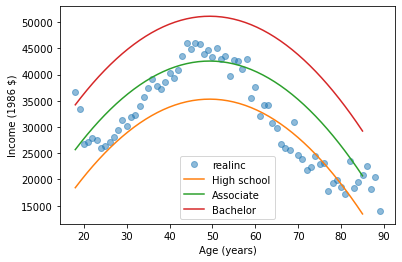

In [61]:
grouped = gss.groupby('age')
mean_income_by_age = grouped['realinc'].mean()
plt.plot(mean_income_by_age, 'o', alpha=0.5, label = 'realinc')

df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

df['educ'] = 12
df['educ2'] = df['educ']**2
pred12 = results.predict(df)
plt.plot(df['age'], pred12, label='High school')

df['educ'] = 14
df['educ2'] = df['educ']**2
pred14 = results.predict(df)
plt.plot(df['age'], pred14, label='Associate')

df['educ'] = 16
df['educ2'] = df['educ']**2
pred16 = results.predict(df)
plt.plot(df['age'], pred16, label='Bachelor')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [62]:
# run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# make the dataframe
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# generate the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


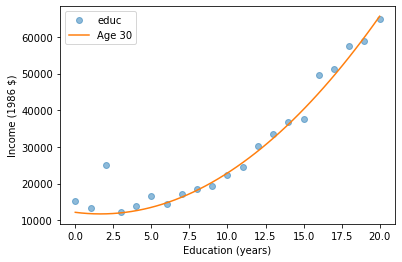

In [63]:
# plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.5, label = 'educ')

# plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

## logistic regression
for categorical feature model.

### gunlaw visualization

In [64]:
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [65]:
gss['gunlaw'].replace([2], [0], inplace=True)
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

### example 9

In [66]:
# multiple regression formula
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data=gss).fit()
results.params     

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

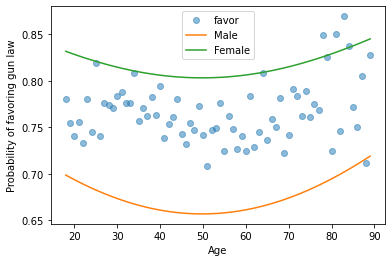

In [67]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

grouped = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()

plt.plot(favor_by_age, 'o', alpha=0.5, label ='favor')
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
plt.show()

### grass prediction

In [68]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall,age2,educ2
0,1972,26.0,1946.0,1,1,18.0,13537.0,0.0,NaN,0.8893,676.0,324.0
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446,1444.0,144.0
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339,3249.0,144.0
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893,3721.0,196.0
4,1972,59.0,1913.0,1,1,12.0,30458.0,0.0,NaN,0.8893,3481.0,144.0


In [69]:
# recode grass
gss['grass'].replace(2, 0, inplace=True)

# run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

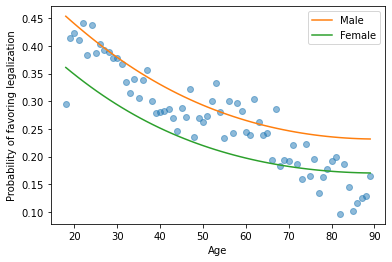

In [70]:
# make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

# plot
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()